In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot,lag_plot

In [88]:
df = pd.read_csv('Microsoft_Stock.csv')
df

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


In [89]:
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [90]:
df.tail()

,Date,Open,High,Low,Close,Volume
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012
1510,3/31/2021 16:00:00,232.91,239.10,232.39,235.77,43623471


In [91]:
df.High

0        40.76
1        40.74
2        41.78
3        41.91
4        41.69
         ...  
1506    236.94
1507    236.71
1508    236.80
1509    233.85
1510    239.10
Name: High, Length: 1511, dtype: float64

In [92]:
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


Ideas for some plots :  
1. Line Plots.
2. Histograms 
3. Box  Plots.
4. Heat Maps.
5. Lag Plots or Scatter Plots.
6. Auto-correlation Plots.

## Line plots

### Opening stock value

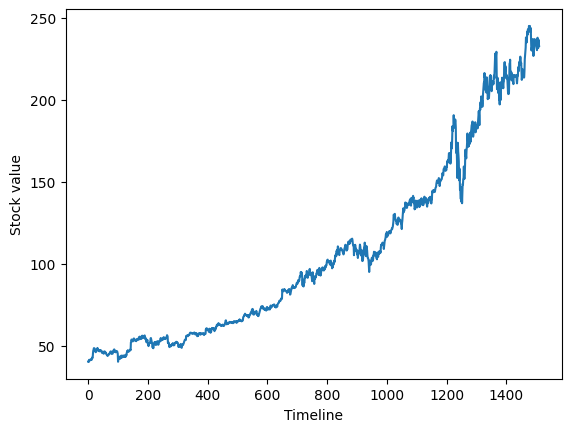

In [93]:
plt.plot(df['Open'])
plt.xlabel('Timeline')
plt.ylabel('Stock value')
plt.show()

### Closing stock value

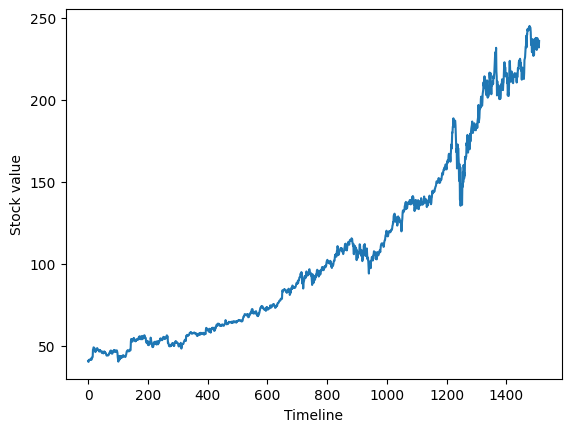

In [94]:
plt.plot(df['Close'])
plt.xlabel('Timeline')
plt.ylabel('Stock value')
plt.show()

### High stock value

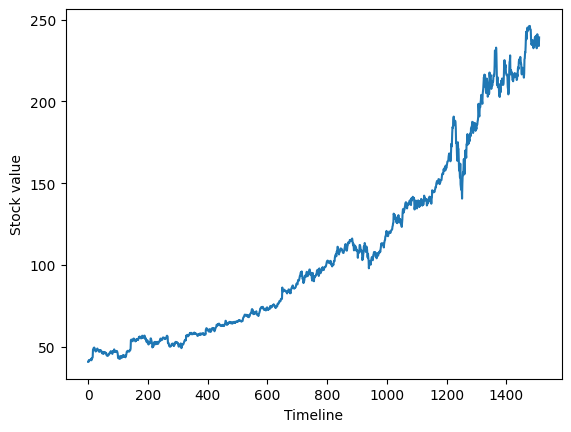

In [95]:
plt.plot(df['High'])
plt.xlabel('Timeline')
plt.ylabel('Stock value')
plt.show()

### Low stock value

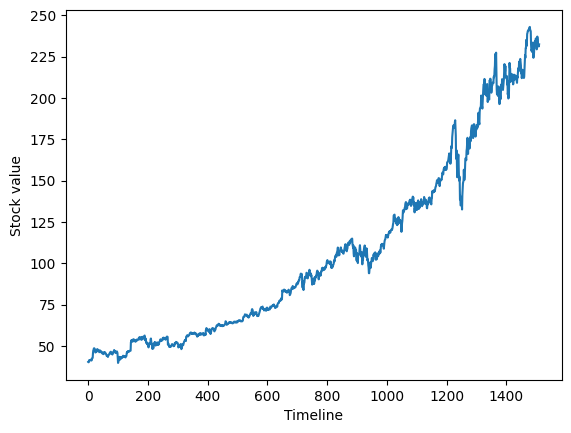

In [96]:
plt.plot(df['Low'])
plt.xlabel('Timeline')
plt.ylabel('Stock value')
plt.show()

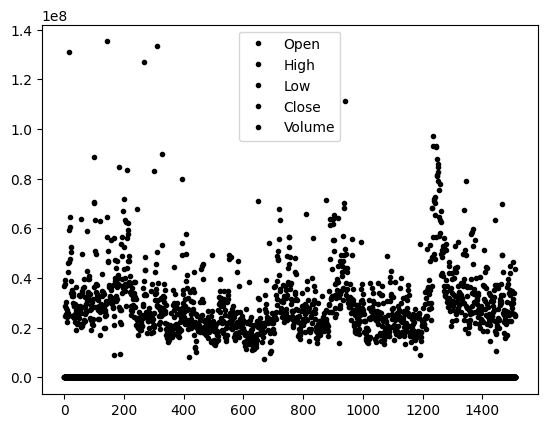

In [97]:
df.plot(style='k.')
plt.show()

In [98]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtype

dtype('<M8[ns]')

In [99]:
df.set_index('Date', inplace=True)

## Histogram

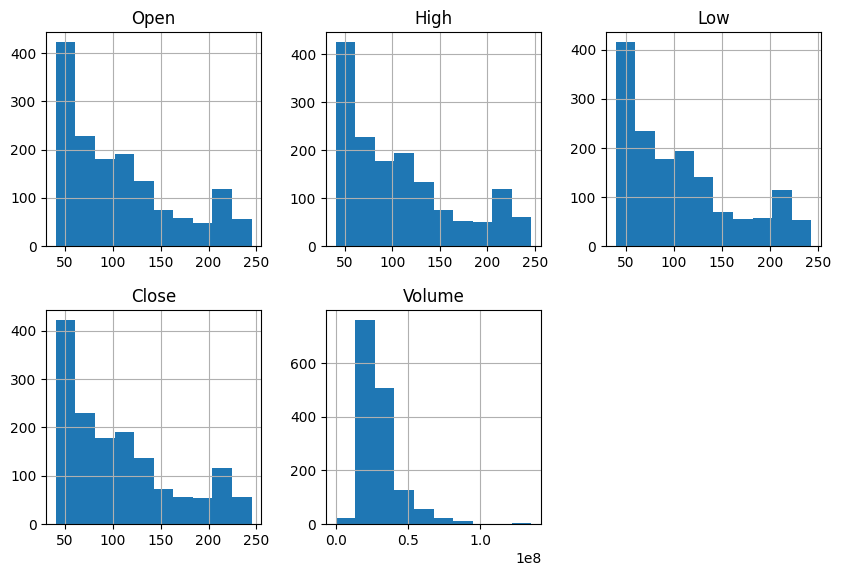

In [100]:
df.hist(figsize=(10, 10), layout=(3, 3))  # Adjust the layout as needed
plt.show()

## Boxplots

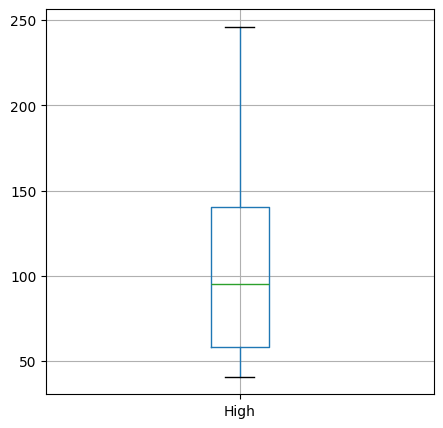

In [101]:
df.boxplot(column = 'High',figsize=(5, 5))
plt.show()

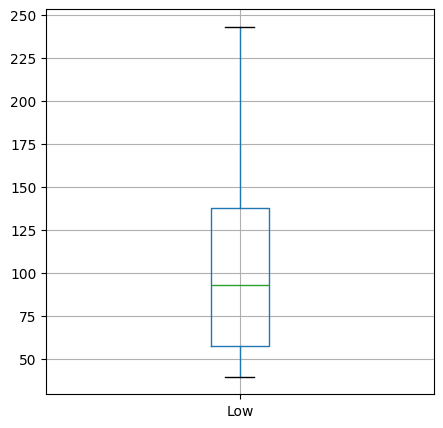

In [102]:
df.boxplot(column = 'Low',figsize=(5, 5))
plt.show()

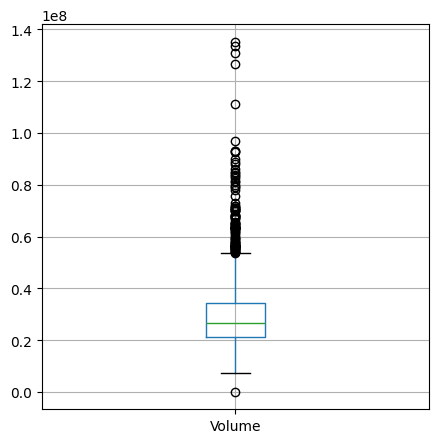

In [103]:
df.boxplot(column = 'Volume',figsize=(5, 5))
plt.show()

## Heatmap

In [104]:
corr = df.corr()

In [105]:
corr

,Open,High,Low,Close,Volume
Open,1.000000,0.999775,0.999757,0.999541,0.054072
High,0.999775,1.000000,0.999622,0.999731,0.062573
Low,0.999757,0.999622,1.000000,0.999767,0.044514
Close,0.999541,0.999731,0.999767,1.000000,0.052153
Volume,0.054072,0.062573,0.044514,0.052153,1.000000


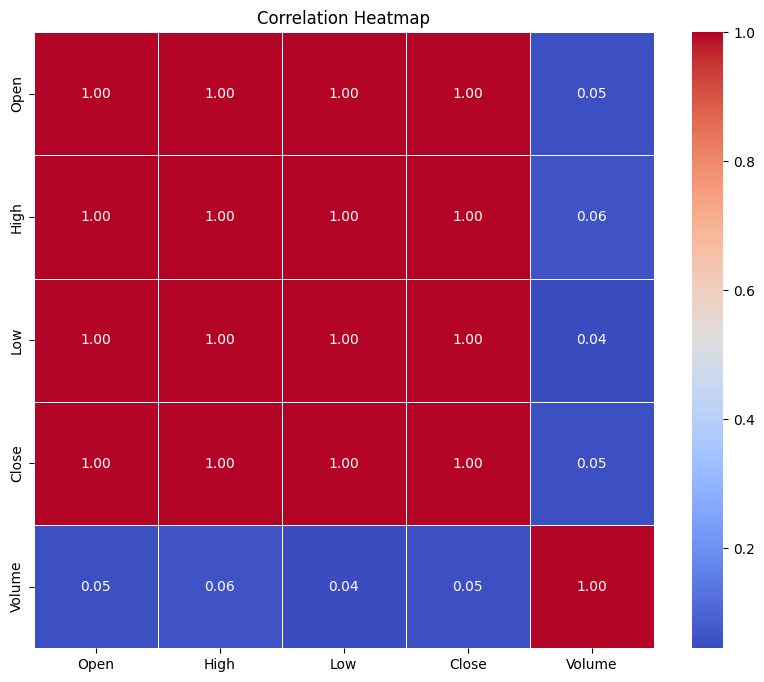

In [106]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Lag - Scatter plots

Pandas has a built-in function for exactly this called the lag plot. It plots the observation at time t on the x-axis and the observation at the next time step (t+1) on the y-axis.
-> If the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship.
-> If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.
-> Either relationship is good as they can be modeled.
More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship. A ball in the middle or a spread across the plot suggests a weak or no relationship.


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

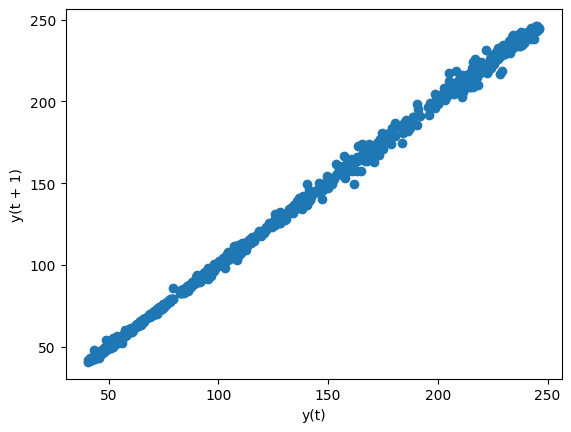

In [107]:
lag_plot(df['High'])

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

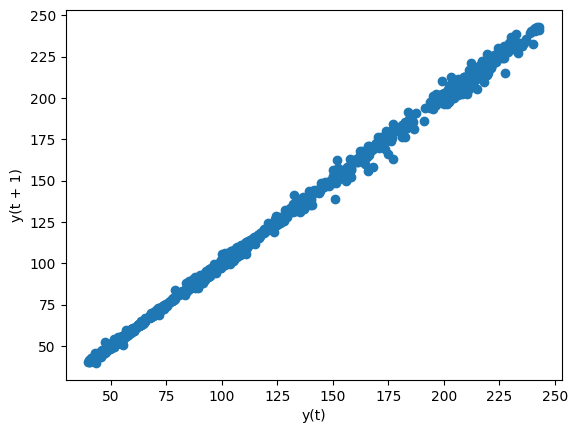

In [108]:
lag_plot(df['Low'])

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

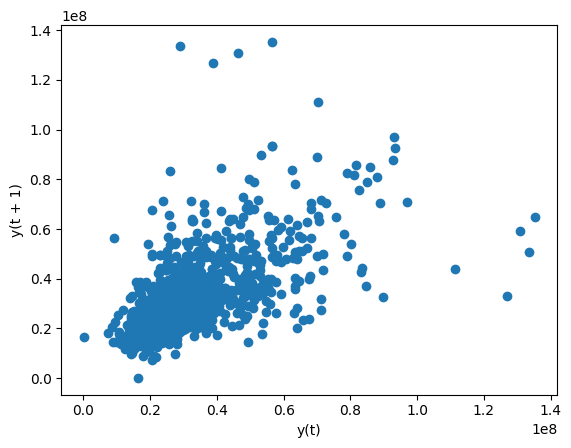

In [109]:
lag_plot(df['Volume'])

## Auto-correlation plot

A correlation value calculated between two groups of numbers, such as observations and their lag=n values, results in a number between -1 and 1. The sign of this number indicates a negative or positive correlation respectively. A value close to zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation.

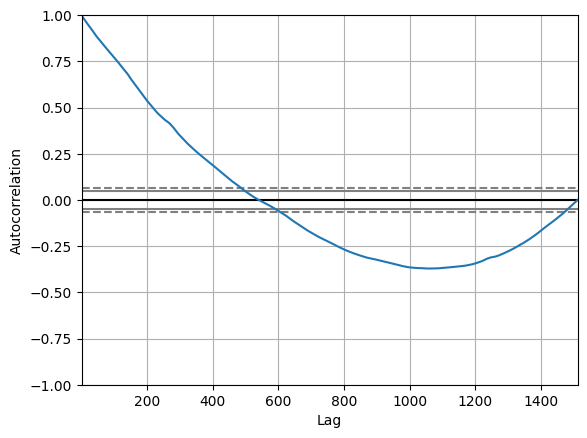

In [110]:
autocorrelation_plot(df['High'])
plt.show()

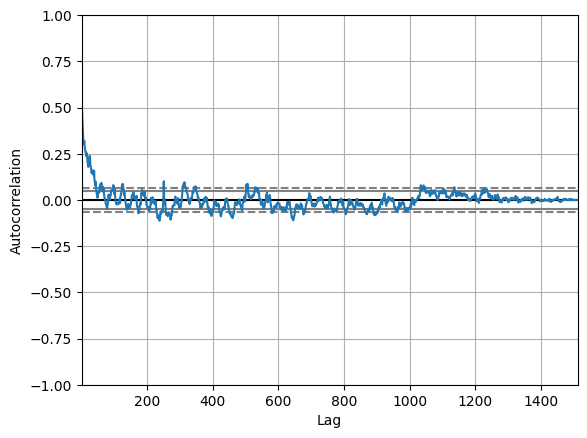

In [111]:
autocorrelation_plot(df['Volume'])
plt.show()

In [126]:
df_cleaned = df.dropna()

In [127]:
print("After handling missing values:\n", df_cleaned.isnull().sum())

After handling missing values:
 Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [128]:
df_cleaned

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322.0
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476.0
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692.0
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375.0
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438.0
...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853.0
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853.0
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455.0


In [131]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df_cleaned['High'].values.reshape(-1, 1)   # keep high as the input feature
y = df_cleaned['Close'].values  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define alpha range for cross-validation
alphas = np.logspace(-4, 4, 50) # This picks up 50 observations between -4 and +4


In [137]:
alphas

array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511374e-02, 1.26485522e-01,
       1.84206997e-01, 2.68269580e-01, 3.90693994e-01, 5.68986603e-01,
       8.28642773e-01, 1.20679264e+00, 1.75751062e+00, 2.55954792e+00,
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04])

In [132]:
# Lasso Regression
lasso_cv = LassoCV(alphas=alphas, cv=5).fit(X_train_scaled, y_train)
lasso_alpha = lasso_cv.alpha_
lasso_pred = lasso_cv.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print(f"Optimum Lasso Alpha: {lasso_alpha:.4f}")
print(f"Lasso Mean Squared Error: {lasso_mse:.4f}")
print(f"Lasso R-squared: {lasso_r2:.4f}")


Optimum Lasso Alpha: 0.0001
Lasso Mean Squared Error: 1.9630
Lasso R-squared: 0.9994


In [133]:

# Ridge Regression
ridge_cv = RidgeCV(alphas=alphas, cv=5).fit(X_train_scaled, y_train)
ridge_alpha = ridge_cv.alpha_
ridge_pred = ridge_cv.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print(f"Optimum Ridge Alpha: {ridge_alpha:.4f}")
print(f"Ridge Mean Squared Error: {ridge_mse:.4f}")
print(f"Ridge R-squared: {ridge_r2:.4f}")


Optimum Ridge Alpha: 0.0007
Ridge Mean Squared Error: 1.9630
Ridge R-squared: 0.9994


In [134]:

# ElasticNet Regression
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5).fit(X_train_scaled, y_train)
elasticnet_alpha = elasticnet_cv.alpha_
elasticnet_pred = elasticnet_cv.predict(X_test_scaled)
elasticnet_mse = mean_squared_error(y_test, elasticnet_pred)
elasticnet_r2 = r2_score(y_test, elasticnet_pred)

print(f"Optimum ElasticNet Alpha: {elasticnet_alpha:.4f}")
print(f"ElasticNet Mean Squared Error: {elasticnet_mse:.4f}")
print(f"ElasticNet R-squared: {elasticnet_r2:.4f}")


Optimum ElasticNet Alpha: 0.0001
ElasticNet Mean Squared Error: 1.9632
ElasticNet R-squared: 0.9994


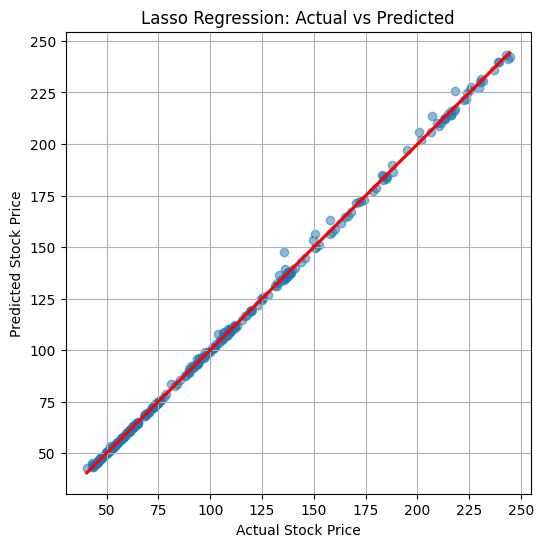

In [135]:
import seaborn as sns

# Visualize Lasso Regression Relationship
plt.figure(figsize=(6, 6))
sns.regplot(x=y_test, y=lasso_pred, ci=None, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Lasso Regression: Actual vs Predicted')
plt.xlabel('Actual Stock Price')
plt.ylabel('Predicted Stock Price')
plt.grid(True)
plt.show()


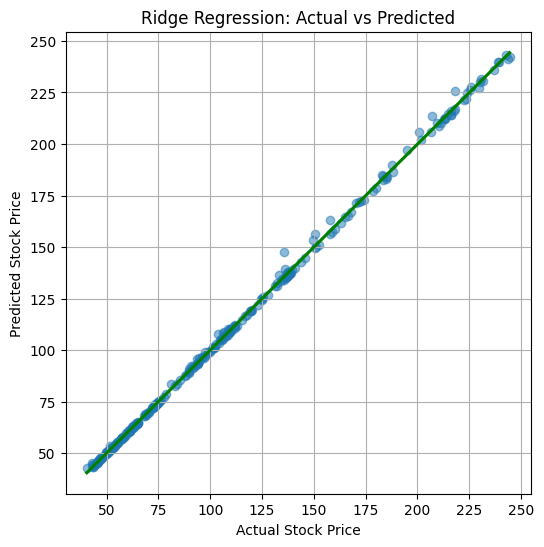

In [136]:

# Visualize Ridge Regression Relationship
plt.figure(figsize=(6, 6))
sns.regplot(x=y_test, y=ridge_pred, ci=None, scatter_kws={'alpha':0.5}, line_kws={"color": "green"})
plt.title('Ridge Regression: Actual vs Predicted')
plt.xlabel('Actual Stock Price')
plt.ylabel('Predicted Stock Price')
plt.grid(True)
plt.show()

